In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.utils import resample

In [51]:
# Read the CSV file
unbalanced_data = pd.read_csv('output.csv')

In [52]:
# 1. Segment Overview
print("Number of customers in each segment:")
print(unbalanced_data['Segment'].value_counts())


Number of customers in each segment:
Segment
0    1153
1     544
Name: count, dtype: int64


In [53]:
# Separate the segments
segment_0 = unbalanced_data[unbalanced_data['Segment'] == 0]
segment_1 = unbalanced_data[unbalanced_data['Segment'] == 1]

# Oversample Segment 1 to match the number of samples in Segment 0
oversampled_segment_1 = resample(segment_1, replace=True, n_samples=len(segment_0), random_state=42)

# Combine the oversampled data
data = pd.concat([segment_0, oversampled_segment_1])

print("Number of customers in each segment after oversampling:")
print(data['Segment'].value_counts())


Number of customers in each segment after oversampling:
Segment
0    1153
1    1153
Name: count, dtype: int64


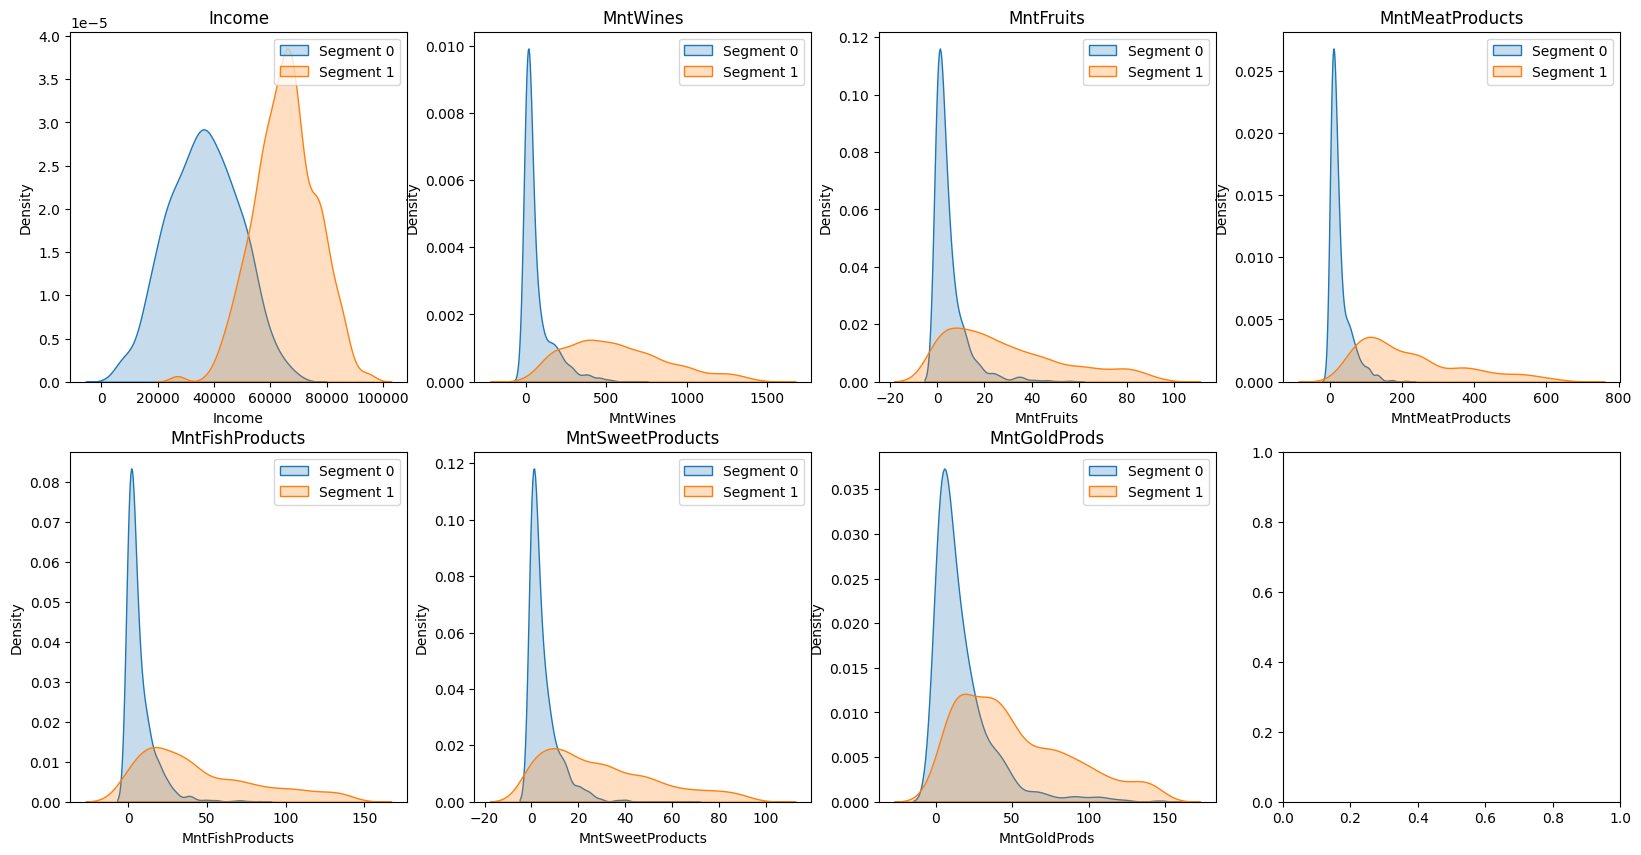

In [54]:
# 2. Income and Spending Analysis
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

for i, col in enumerate(['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']):
    for segment in data['Segment'].unique():
        segment_data = data[data['Segment'] == segment]
        sns.kdeplot(segment_data[col], fill=True, ax=axs[i], label=f'Segment {segment}')
        axs[i].set_title(col)
        axs[i].legend()

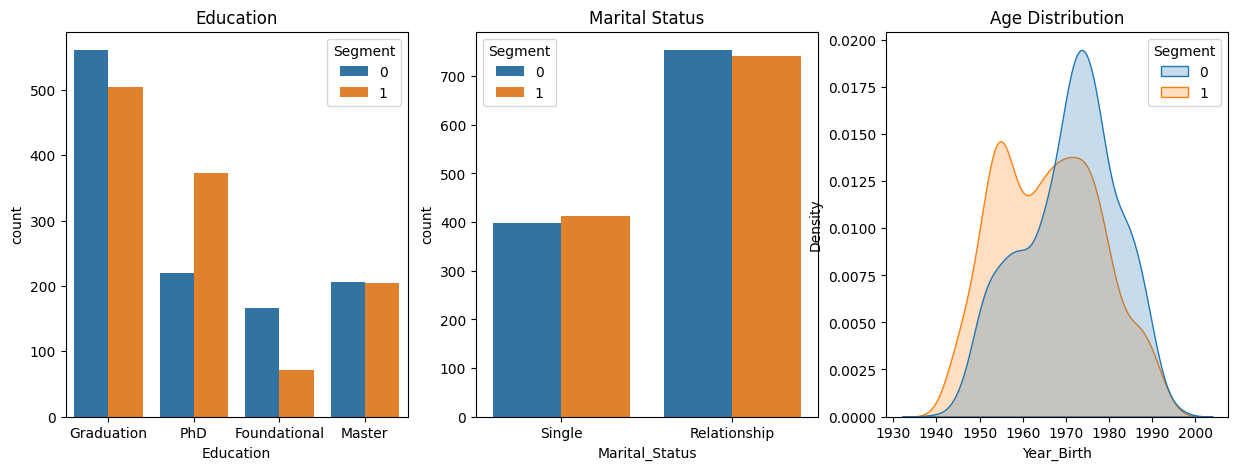

In [55]:
# 3. Demographic Analysis
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axs = axs.flatten()
sns.countplot(x='Education', hue='Segment', data=data, ax=axs[0])
axs[0].set_title('Education')
sns.countplot(x='Marital_Status', hue='Segment', data=data, ax=axs[1])
axs[1].set_title('Marital Status')
sns.kdeplot(data=data, x='Year_Birth', hue='Segment', fill=True, ax=axs[2])
axs[2].set_title('Age Distribution')

plt.show()

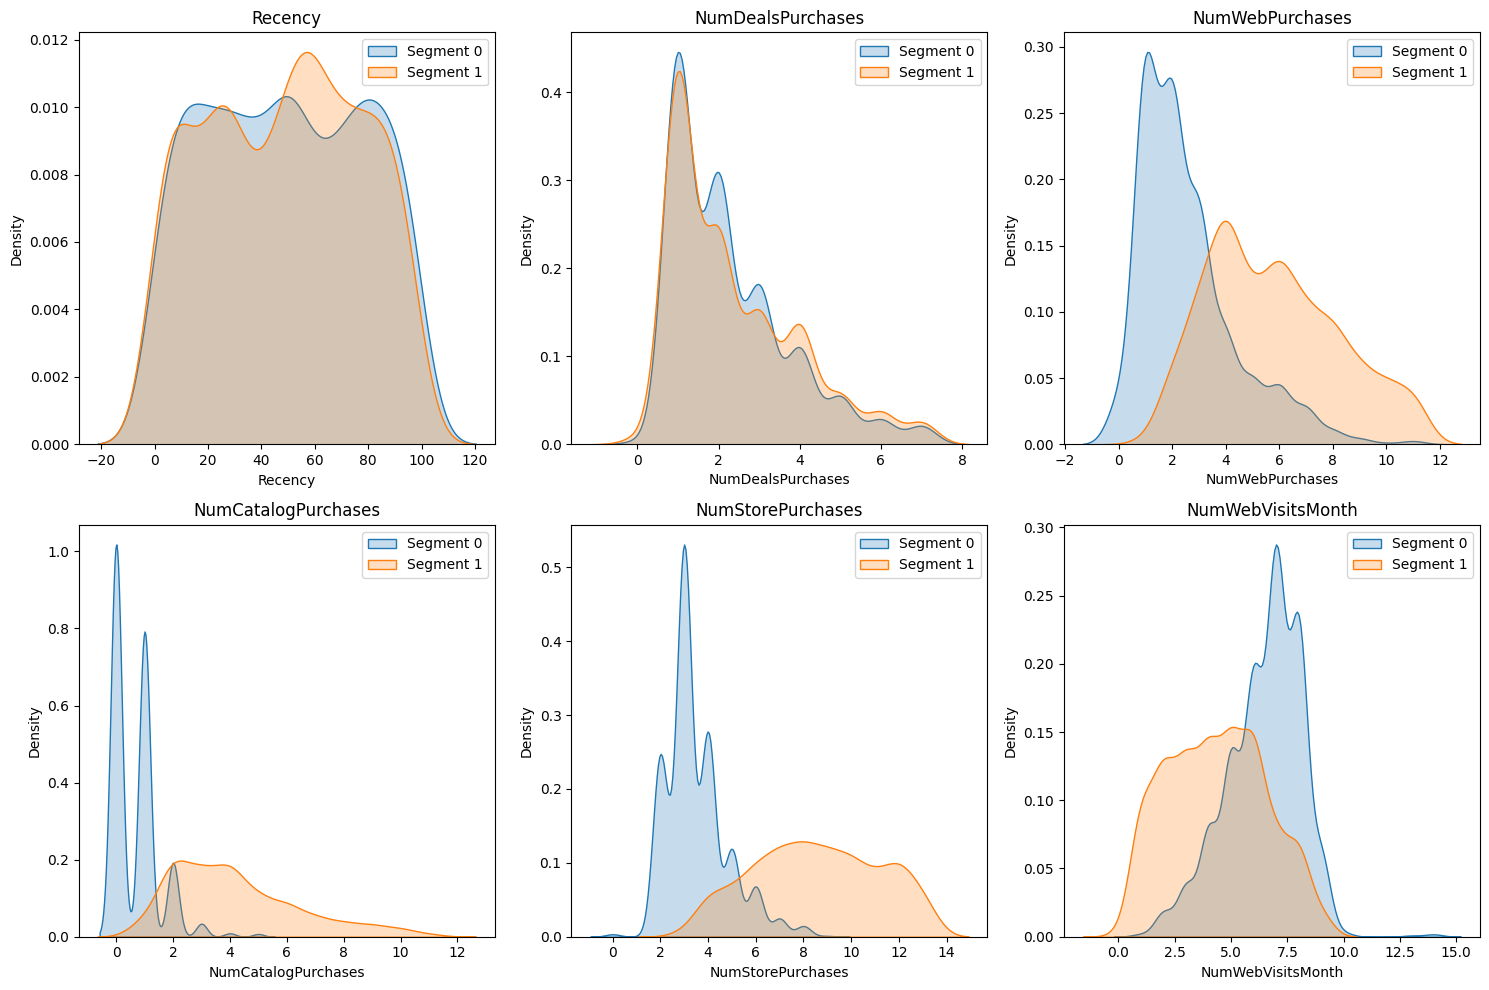

In [56]:
# 4. Engagement Analysis
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(['Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']):
    for segment in data['Segment'].unique():
        segment_data = data[data['Segment'] == segment]
        sns.kdeplot(segment_data[col], fill=True, ax=axs[i], label=f'Segment {segment}')
        axs[i].set_title(col)
        axs[i].legend()

plt.tight_layout()
plt.show()

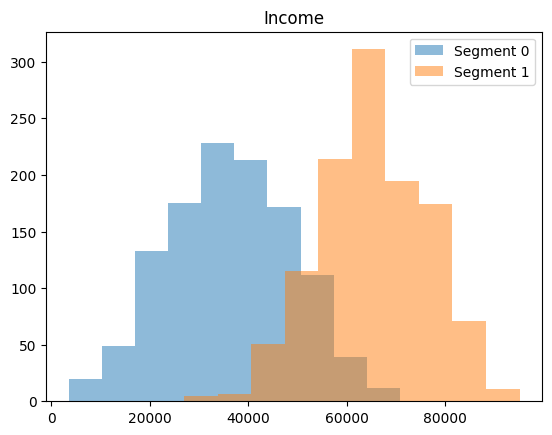

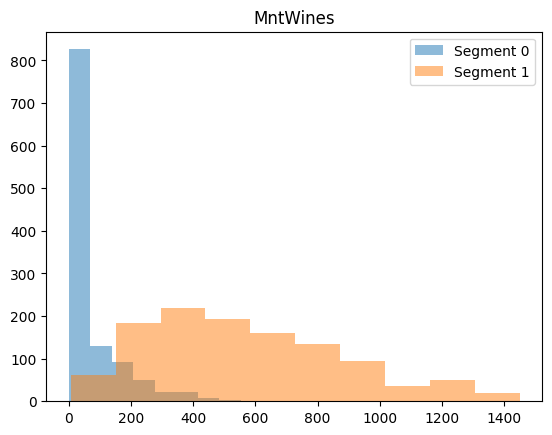

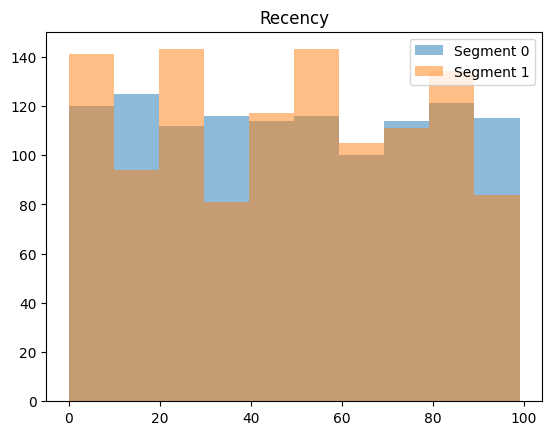

In [57]:
# 5. Visualization
for col in ['Income', 'MntWines', 'Recency']:
    plt.figure()
    for segment in data['Segment'].unique():
        segment_data = data[data['Segment'] == segment]
        plt.hist(segment_data[col], alpha=0.5, label=f'Segment {segment}')
    plt.title(col)
    plt.legend()
    plt.show()